In [1]:
from data.gen_data import build_X, build_Y, build_XY
from data.gen_data_config import gen_data_config
from evaluation import score
import pandas as pd
import numpy as np
from util import plot_roi, categori_reverse
from model import build_model, build_embed_model
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

Using TensorFlow backend.


In [2]:
def tsne_trans(input):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    return tsne.fit_transform(input)

In [3]:
embedding_shape = 32
batch_size = 128
epochs = 300

In [4]:
data_s, data_e = '2001/1/1', '2018/12/31'
target_s, target_e = '2019/1/1', '2019/12/31'
feature_days = 3

In [5]:
sne_dict = {
    'data':{},
    'tar':{}
}
embed_dict = {
    'data':{},
    'tar':{}
}

In [6]:
x, y, data_result = build_XY(data_s, data_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)
tar_x, tar_y, tar_result = build_XY(target_s, target_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)

In [7]:
'''for t-SNE'''
feature_day = 1

sne_data, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tar, _, _ = build_XY(target_s, target_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tr_y = []
sne_te_y = []
# data
for r in sne_data:
    if(r[1] > r[0]):
        sne_tr_y.append(0)
    else:
        sne_tr_y.append(1)
# target
for r in sne_tar:
    if(r[1] > r[0]):
        sne_te_y.append(0)
    else:
        sne_te_y.append(1)

In [8]:
print(f'x的shape：{x.shape}')
print(f"一天的k-bar vector長度：{len(gen_data_config['selected_features'])}")

x的shape：(4456, 129)
一天的k-bar vector長度：43


# Task_1

給予t, t-1, t-2的資料作為input預測t-1, t-2

Loss:min(t-1,t-2的RMSE)

In [9]:
task = '1'

In [10]:
'''Data'''
locals()[f'task_{task}_y'] = x[:, len(gen_data_config['selected_features']):]
x = np.reshape(x, (-1, feature_days, len(gen_data_config['selected_features'])))
tar_x = np.reshape(tar_x, (-1, feature_days, len(gen_data_config['selected_features'])))

In [12]:
'''build model'''
model = build_embed_model('rnn', 
                           x.shape, 
                           locals()[f'task_{task}_y'].shape, 
                           embedding_shape, 
                          'sigmoid')
sgd = SGD(lr=0.1, momentum=0.1, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [13]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    locals()[f'task_{task}_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 2s 551us/step - loss: 12722.0720 - accuracy: 0.2267 - val_loss: 9600.8293 - val_accuracy: 0.0000e+00
Epoch 2/300
4010/4010 [==============================] - 1s 258us/step - loss: 12713.3255 - accuracy: 0.2509 - val_loss: 9598.3602 - val_accuracy: 0.0135
Epoch 3/300
4010/4010 [==============================] - 1s 254us/step - loss: 12711.4653 - accuracy: 0.2227 - val_loss: 9597.4051 - val_accuracy: 0.0179
Epoch 4/300
4010/4010 [==============================] - 1s 260us/step - loss: 12710.5363 - accuracy: 0.1885 - val_loss: 9596.2306 - val_accuracy: 0.0314
Epoch 5/300
4010/4010 [==============================] - 1s 253us/step - loss: 12710.2728 - accuracy: 0.1511 - val_loss: 9595.4941 - val_accuracy: 0.0381
Epoch 6/300
4010/4010 [==============================] - 1s 261us/step - loss: 12709.7401 - accuracy: 0.1698 - val_loss: 9595.0926 - val_accuracy: 0.0448
Epoch 7/300
4010/4010 [==

4010/4010 [==============================] - 1s 270us/step - loss: 12706.6920 - accuracy: 0.0641 - val_loss: 9592.8107 - val_accuracy: 0.0314
Epoch 54/300
4010/4010 [==============================] - 1s 272us/step - loss: 12706.6376 - accuracy: 0.0646 - val_loss: 9591.7535 - val_accuracy: 0.0179
Epoch 55/300
4010/4010 [==============================] - 1s 279us/step - loss: 12706.5216 - accuracy: 0.0641 - val_loss: 9591.6332 - val_accuracy: 0.0336
Epoch 56/300
4010/4010 [==============================] - 1s 276us/step - loss: 12706.5536 - accuracy: 0.0673 - val_loss: 9592.0702 - val_accuracy: 0.0359
Epoch 57/300
4010/4010 [==============================] - 1s 284us/step - loss: 12706.4703 - accuracy: 0.0623 - val_loss: 9591.7579 - val_accuracy: 0.0202
Epoch 58/300
4010/4010 [==============================] - 1s 280us/step - loss: 12706.4334 - accuracy: 0.0698 - val_loss: 9591.7007 - val_accuracy: 0.0336
Epoch 59/300
4010/4010 [==============================] - 1s 286us/step - loss: 127

Epoch 106/300
4010/4010 [==============================] - 1s 271us/step - loss: 12706.3414 - accuracy: 0.0728 - val_loss: 9592.3302 - val_accuracy: 0.0112
Epoch 107/300
4010/4010 [==============================] - 1s 277us/step - loss: 12706.2129 - accuracy: 0.0666 - val_loss: 9591.5075 - val_accuracy: 0.0179
Epoch 108/300
4010/4010 [==============================] - 1s 259us/step - loss: 12706.2686 - accuracy: 0.0561 - val_loss: 9591.7169 - val_accuracy: 0.0157
Epoch 109/300
4010/4010 [==============================] - 1s 259us/step - loss: 12706.3412 - accuracy: 0.0606 - val_loss: 9591.8997 - val_accuracy: 0.0112
Epoch 110/300
4010/4010 [==============================] - 1s 269us/step - loss: 12706.3691 - accuracy: 0.0566 - val_loss: 9591.5223 - val_accuracy: 0.0202
Epoch 111/300
4010/4010 [==============================] - 1s 266us/step - loss: 12706.4053 - accuracy: 0.0686 - val_loss: 9591.6595 - val_accuracy: 0.0471
Epoch 112/300
4010/4010 [==============================] - 1s 25

4010/4010 [==============================] - 1s 257us/step - loss: 12706.5769 - accuracy: 0.0668 - val_loss: 9591.6788 - val_accuracy: 0.0314
Epoch 159/300
4010/4010 [==============================] - 1s 247us/step - loss: 12706.4566 - accuracy: 0.0511 - val_loss: 9591.6770 - val_accuracy: 0.0135
Epoch 160/300
4010/4010 [==============================] - 1s 252us/step - loss: 12706.7138 - accuracy: 0.0486 - val_loss: 9591.6656 - val_accuracy: 0.0538
Epoch 161/300
4010/4010 [==============================] - 1s 252us/step - loss: 12706.6140 - accuracy: 0.0676 - val_loss: 9591.6293 - val_accuracy: 0.0336
Epoch 162/300
4010/4010 [==============================] - 1s 250us/step - loss: 12706.5513 - accuracy: 0.0606 - val_loss: 9592.0359 - val_accuracy: 0.0112
Epoch 163/300
4010/4010 [==============================] - 1s 255us/step - loss: 12706.6242 - accuracy: 0.0566 - val_loss: 9591.7254 - val_accuracy: 0.0224
Epoch 164/300
4010/4010 [==============================] - 1s 247us/step - los

4010/4010 [==============================] - 1s 249us/step - loss: 12706.5819 - accuracy: 0.0332 - val_loss: 9591.7544 - val_accuracy: 0.0090
Epoch 211/300
4010/4010 [==============================] - 1s 256us/step - loss: 12706.3826 - accuracy: 0.0322 - val_loss: 9591.5194 - val_accuracy: 0.0067
Epoch 212/300
4010/4010 [==============================] - 1s 248us/step - loss: 12706.2980 - accuracy: 0.0312 - val_loss: 9591.7598 - val_accuracy: 0.0090
Epoch 213/300
4010/4010 [==============================] - 1s 250us/step - loss: 12706.2325 - accuracy: 0.0334 - val_loss: 9591.7685 - val_accuracy: 0.0112
Epoch 214/300
4010/4010 [==============================] - 1s 307us/step - loss: 12706.7609 - accuracy: 0.0357 - val_loss: 9592.1113 - val_accuracy: 0.0090
Epoch 215/300
4010/4010 [==============================] - 1s 270us/step - loss: 12706.5939 - accuracy: 0.0344 - val_loss: 9591.7971 - val_accuracy: 0.0179
Epoch 216/300
4010/4010 [==============================] - 1s 282us/step - los

4010/4010 [==============================] - 1s 268us/step - loss: 12706.2761 - accuracy: 0.0307 - val_loss: 9591.6119 - val_accuracy: 0.0090
Epoch 263/300
4010/4010 [==============================] - 1s 279us/step - loss: 12706.2358 - accuracy: 0.0244 - val_loss: 9592.5857 - val_accuracy: 0.0135
Epoch 264/300
4010/4010 [==============================] - 1s 285us/step - loss: 12706.1539 - accuracy: 0.0317 - val_loss: 9591.9794 - val_accuracy: 0.0179
Epoch 265/300
4010/4010 [==============================] - 1s 269us/step - loss: 12706.3150 - accuracy: 0.0267 - val_loss: 9591.4461 - val_accuracy: 0.0112
Epoch 266/300
4010/4010 [==============================] - 1s 279us/step - loss: 12706.1911 - accuracy: 0.0257 - val_loss: 9591.5271 - val_accuracy: 0.0090
Epoch 267/300
4010/4010 [==============================] - 1s 281us/step - loss: 12706.1103 - accuracy: 0.0259 - val_loss: 9591.8063 - val_accuracy: 0.0090
Epoch 268/300
4010/4010 [==============================] - 1s 277us/step - los

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 256)            307200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 256)            525312    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 86)               

In [16]:
'''get embedding output'''
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[5].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [17]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2a
分類 t+1 是上漲或下跌

In [18]:
task = '2a'

In [19]:
feature_day = 0
task_2a, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2a_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2a_y.append(0)
    else:
        task_2a_y.append(1)
task_2a_y = keras.utils.to_categorical(task_2a_y, 2)

In [20]:
'''build model'''
model = build_embed_model('rnn', x.shape, task_2a_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [21]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2a_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 2s 582us/step - loss: 0.7529 - accuracy: 0.4983 - val_loss: 0.6967 - val_accuracy: 0.4910
Epoch 2/300
4010/4010 [==============================] - 1s 278us/step - loss: 0.6865 - accuracy: 0.5501 - val_loss: 0.6960 - val_accuracy: 0.4978
Epoch 3/300
4010/4010 [==============================] - 1s 275us/step - loss: 0.6759 - accuracy: 0.5711 - val_loss: 0.6980 - val_accuracy: 0.5067
Epoch 4/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.6676 - accuracy: 0.5928 - val_loss: 0.6964 - val_accuracy: 0.4933
Epoch 5/300
4010/4010 [==============================] - 1s 275us/step - loss: 0.6528 - accuracy: 0.6107 - val_loss: 0.6917 - val_accuracy: 0.4933
Epoch 6/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.6547 - accuracy: 0.5998 - val_loss: 0.7020 - val_accuracy: 0.5202
Epoch 7/300
4010/4010 [==============================] - 1s 268us/step 

4010/4010 [==============================] - 1s 280us/step - loss: 0.2548 - accuracy: 0.8848 - val_loss: 1.6615 - val_accuracy: 0.5224
Epoch 57/300
4010/4010 [==============================] - 1s 272us/step - loss: 0.2332 - accuracy: 0.8925 - val_loss: 1.5983 - val_accuracy: 0.5247
Epoch 58/300
4010/4010 [==============================] - 1s 272us/step - loss: 0.2192 - accuracy: 0.8995 - val_loss: 1.6893 - val_accuracy: 0.5135
Epoch 59/300
4010/4010 [==============================] - 1s 284us/step - loss: 0.1957 - accuracy: 0.9117 - val_loss: 1.6739 - val_accuracy: 0.5381
Epoch 60/300
4010/4010 [==============================] - 1s 272us/step - loss: 0.2161 - accuracy: 0.9015 - val_loss: 1.6579 - val_accuracy: 0.5448
Epoch 61/300
4010/4010 [==============================] - 1s 271us/step - loss: 0.1986 - accuracy: 0.9130 - val_loss: 1.7367 - val_accuracy: 0.5381
Epoch 62/300
4010/4010 [==============================] - 1s 275us/step - loss: 0.2143 - accuracy: 0.9027 - val_loss: 1.7801 

4010/4010 [==============================] - 1s 302us/step - loss: 0.1520 - accuracy: 0.9364 - val_loss: 2.2607 - val_accuracy: 0.5045
Epoch 112/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.1319 - accuracy: 0.9469 - val_loss: 2.2914 - val_accuracy: 0.5157
Epoch 113/300
4010/4010 [==============================] - 1s 288us/step - loss: 0.1331 - accuracy: 0.9449 - val_loss: 2.1139 - val_accuracy: 0.5202
Epoch 114/300
4010/4010 [==============================] - 1s 285us/step - loss: 0.1038 - accuracy: 0.9589 - val_loss: 2.3044 - val_accuracy: 0.5067
Epoch 115/300
4010/4010 [==============================] - 1s 289us/step - loss: 0.0817 - accuracy: 0.9728 - val_loss: 2.2344 - val_accuracy: 0.5202
Epoch 116/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.0776 - accuracy: 0.9691 - val_loss: 2.3702 - val_accuracy: 0.5224
Epoch 117/300
4010/4010 [==============================] - 1s 289us/step - loss: 0.0703 - accuracy: 0.9713 - val_loss: 2

4010/4010 [==============================] - 1s 274us/step - loss: 0.0841 - accuracy: 0.9676 - val_loss: 2.4977 - val_accuracy: 0.5269
Epoch 167/300
4010/4010 [==============================] - 1s 260us/step - loss: 0.0667 - accuracy: 0.9743 - val_loss: 2.5800 - val_accuracy: 0.5157
Epoch 168/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.0472 - accuracy: 0.9825 - val_loss: 2.5488 - val_accuracy: 0.5000
Epoch 169/300
4010/4010 [==============================] - 1s 273us/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 2.6527 - val_accuracy: 0.5067
Epoch 170/300
4010/4010 [==============================] - 1s 260us/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 2.6729 - val_accuracy: 0.5247
Epoch 171/300
4010/4010 [==============================] - 1s 271us/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 2.7448 - val_accuracy: 0.5269
Epoch 172/300
4010/4010 [==============================] - 1s 273us/step - loss: 0.0505 - accuracy: 0.9818 - val_loss: 2

4010/4010 [==============================] - 1s 273us/step - loss: 0.0189 - accuracy: 0.9930 - val_loss: 2.9387 - val_accuracy: 0.5157
Epoch 222/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 2.9502 - val_accuracy: 0.4955
Epoch 223/300
4010/4010 [==============================] - 1s 272us/step - loss: 0.0151 - accuracy: 0.9963 - val_loss: 2.9197 - val_accuracy: 0.5045
Epoch 224/300
4010/4010 [==============================] - 1s 269us/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 3.1421 - val_accuracy: 0.5090
Epoch 225/300
4010/4010 [==============================] - 1s 282us/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 3.1943 - val_accuracy: 0.5269
Epoch 226/300
4010/4010 [==============================] - 1s 282us/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 3.1329 - val_accuracy: 0.5202
Epoch 227/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 3

4010/4010 [==============================] - 1s 282us/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 3.3441 - val_accuracy: 0.5247
Epoch 277/300
4010/4010 [==============================] - 1s 287us/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 3.1982 - val_accuracy: 0.5314
Epoch 278/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.0324 - accuracy: 0.9890 - val_loss: 3.2104 - val_accuracy: 0.5112
Epoch 279/300
4010/4010 [==============================] - 1s 286us/step - loss: 0.0506 - accuracy: 0.9828 - val_loss: 3.0894 - val_accuracy: 0.5247
Epoch 280/300
4010/4010 [==============================] - 1s 291us/step - loss: 0.0816 - accuracy: 0.9708 - val_loss: 2.6452 - val_accuracy: 0.5247
Epoch 281/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.1078 - accuracy: 0.9579 - val_loss: 2.4209 - val_accuracy: 0.5157
Epoch 282/300
4010/4010 [==============================] - 1s 291us/step - loss: 0.0837 - accuracy: 0.9701 - val_loss: 2

In [22]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[5].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [23]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2b
分類 t 上漲或下跌

In [24]:
task = '2b'

In [25]:
feature_day = 1
task_2b, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2b_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2b_y.append(0)
    else:
        task_2b_y.append(1)
task_2b_y = keras.utils.to_categorical(task_2b_y, 2)

In [26]:
'''build model'''
model = build_embed_model('rnn', x.shape, task_2b_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [27]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2b_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 2s 597us/step - loss: 0.7751 - accuracy: 0.4965 - val_loss: 0.6954 - val_accuracy: 0.5090
Epoch 2/300
4010/4010 [==============================] - 1s 279us/step - loss: 0.6801 - accuracy: 0.5686 - val_loss: 0.6976 - val_accuracy: 0.5179
Epoch 3/300
4010/4010 [==============================] - 1s 268us/step - loss: 0.6672 - accuracy: 0.5835 - val_loss: 0.6936 - val_accuracy: 0.5404
Epoch 4/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.6520 - accuracy: 0.6185 - val_loss: 0.6947 - val_accuracy: 0.5135
Epoch 5/300
4010/4010 [==============================] - 1s 288us/step - loss: 0.6480 - accuracy: 0.6167 - val_loss: 0.6967 - val_accuracy: 0.5336
Epoch 6/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.6391 - accuracy: 0.6264 - val_loss: 0.6910 - val_accuracy: 0.5426
Epoch 7/300
4010/4010 [==============================] - 1s 270us/step 

4010/4010 [==============================] - 1s 275us/step - loss: 0.2626 - accuracy: 0.8808 - val_loss: 1.7497 - val_accuracy: 0.5067
Epoch 57/300
4010/4010 [==============================] - 1s 281us/step - loss: 0.2180 - accuracy: 0.8970 - val_loss: 1.6716 - val_accuracy: 0.5202
Epoch 58/300
4010/4010 [==============================] - 1s 273us/step - loss: 0.1903 - accuracy: 0.9182 - val_loss: 1.7142 - val_accuracy: 0.5179
Epoch 59/300
4010/4010 [==============================] - 1s 284us/step - loss: 0.1911 - accuracy: 0.9175 - val_loss: 1.7279 - val_accuracy: 0.5359
Epoch 60/300
4010/4010 [==============================] - 1s 283us/step - loss: 0.2098 - accuracy: 0.9090 - val_loss: 1.7620 - val_accuracy: 0.5247
Epoch 61/300
4010/4010 [==============================] - 1s 280us/step - loss: 0.2306 - accuracy: 0.8960 - val_loss: 1.7366 - val_accuracy: 0.5359
Epoch 62/300
4010/4010 [==============================] - 1s 277us/step - loss: 0.2026 - accuracy: 0.9105 - val_loss: 1.7997 

4010/4010 [==============================] - 1s 295us/step - loss: 0.0946 - accuracy: 0.9596 - val_loss: 2.3742 - val_accuracy: 0.5493
Epoch 112/300
4010/4010 [==============================] - 1s 299us/step - loss: 0.0839 - accuracy: 0.9678 - val_loss: 2.3339 - val_accuracy: 0.5650
Epoch 113/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.0962 - accuracy: 0.9631 - val_loss: 2.4131 - val_accuracy: 0.5493
Epoch 114/300
4010/4010 [==============================] - 1s 291us/step - loss: 0.1062 - accuracy: 0.9569 - val_loss: 2.2965 - val_accuracy: 0.5426
Epoch 115/300
4010/4010 [==============================] - 1s 295us/step - loss: 0.0949 - accuracy: 0.9623 - val_loss: 2.4534 - val_accuracy: 0.5202
Epoch 116/300
4010/4010 [==============================] - 1s 298us/step - loss: 0.0758 - accuracy: 0.9698 - val_loss: 2.5371 - val_accuracy: 0.5247
Epoch 117/300
4010/4010 [==============================] - 1s 294us/step - loss: 0.0715 - accuracy: 0.9728 - val_loss: 2

4010/4010 [==============================] - 1s 280us/step - loss: 0.0545 - accuracy: 0.9803 - val_loss: 2.7320 - val_accuracy: 0.5224
Epoch 167/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.0577 - accuracy: 0.9793 - val_loss: 2.6745 - val_accuracy: 0.5381
Epoch 168/300
4010/4010 [==============================] - 1s 276us/step - loss: 0.0474 - accuracy: 0.9820 - val_loss: 2.8675 - val_accuracy: 0.5135
Epoch 169/300
4010/4010 [==============================] - 1s 287us/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 2.9036 - val_accuracy: 0.5404
Epoch 170/300
4010/4010 [==============================] - 1s 278us/step - loss: 0.0304 - accuracy: 0.9890 - val_loss: 2.9308 - val_accuracy: 0.5179
Epoch 171/300
4010/4010 [==============================] - 1s 282us/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 2.9401 - val_accuracy: 0.5516
Epoch 172/300
4010/4010 [==============================] - 1s 276us/step - loss: 0.0390 - accuracy: 0.9853 - val_loss: 2

4010/4010 [==============================] - 1s 281us/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 3.2666 - val_accuracy: 0.5359
Epoch 222/300
4010/4010 [==============================] - 1s 279us/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 3.3088 - val_accuracy: 0.5247
Epoch 223/300
4010/4010 [==============================] - 1s 288us/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 3.3222 - val_accuracy: 0.5291
Epoch 224/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.0476 - accuracy: 0.9838 - val_loss: 3.1395 - val_accuracy: 0.5202
Epoch 225/300
4010/4010 [==============================] - 1s 281us/step - loss: 0.0608 - accuracy: 0.9771 - val_loss: 2.9914 - val_accuracy: 0.4978
Epoch 226/300
4010/4010 [==============================] - 1s 278us/step - loss: 0.0684 - accuracy: 0.9758 - val_loss: 2.7816 - val_accuracy: 0.5291
Epoch 227/300
4010/4010 [==============================] - 1s 274us/step - loss: 0.0895 - accuracy: 0.9668 - val_loss: 2

4010/4010 [==============================] - 1s 295us/step - loss: 0.0608 - accuracy: 0.9791 - val_loss: 2.6946 - val_accuracy: 0.4978
Epoch 277/300
4010/4010 [==============================] - 1s 299us/step - loss: 0.0669 - accuracy: 0.9753 - val_loss: 2.6731 - val_accuracy: 0.5202
Epoch 278/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.0584 - accuracy: 0.9781 - val_loss: 2.5186 - val_accuracy: 0.5314
Epoch 279/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.0457 - accuracy: 0.9825 - val_loss: 2.6105 - val_accuracy: 0.4978
Epoch 280/300
4010/4010 [==============================] - 1s 296us/step - loss: 0.0311 - accuracy: 0.9890 - val_loss: 2.7857 - val_accuracy: 0.5067
Epoch 281/300
4010/4010 [==============================] - 1s 293us/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 2.8864 - val_accuracy: 0.4933
Epoch 282/300
4010/4010 [==============================] - 1s 295us/step - loss: 0.0184 - accuracy: 0.9935 - val_loss: 3

In [29]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[5].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [30]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# t-SNE

Text(0.5, 0.98, 't-SNE model:LSTM_32')

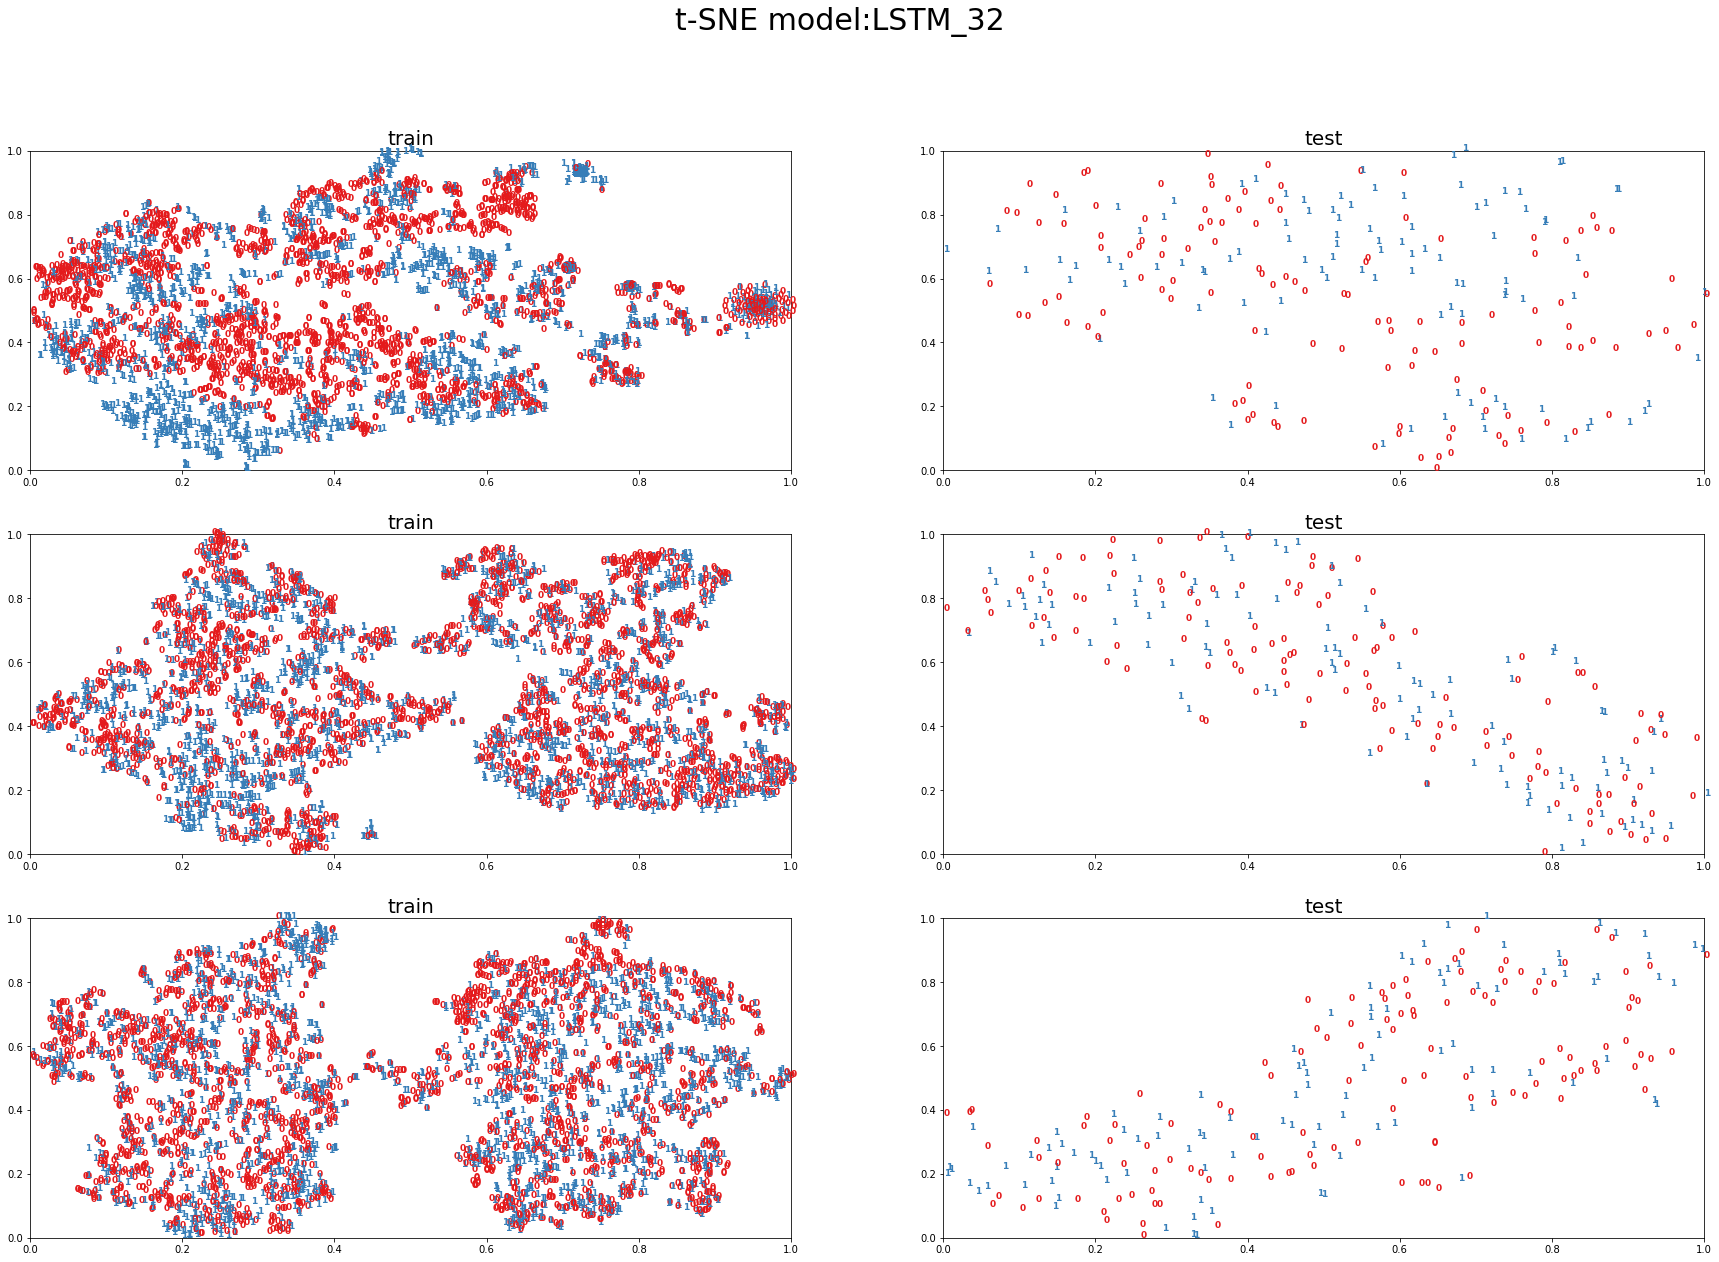

In [33]:
fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

for i, t in zip(range(1,4), ['1', '2a', '2b']):
    i = i*2
    left, right = i-1, i
    '''plot left'''
    X_tsne = sne_dict['data'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{left}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_tr_y[i]), color=plt.cm.Set1(sne_tr_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
    '''plot right'''
    X_tsne = sne_dict['tar'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{right}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_te_y[i]), color=plt.cm.Set1(sne_te_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

    locals()[f'ax{left}'].set_title('train', fontsize=20)
    locals()[f'ax{right}'].set_title('test', fontsize=20)

fig.suptitle(f't-SNE model:LSTM_{embedding_shape}', fontsize=30)

# save

In [32]:
from pickle import dump
fig.savefig(f'./fig/tsne_rnn_{embedding_shape}.png')
file = open(f'./embedding_data/rnn_{embedding_shape}', 'wb')
dump(embed_dict, file)